# Proyek Akhir: Menyelesaikan Permasalahan Perusahaan Edutech

- Nama: Margareta Lola Lali Lulita
- Email: margaretalolalilulita@gmail.com
- Id Dicoding: margaretalola

## Persiapan

### Menyiapkan library yang dibutuhkan

Melakukan import library dan setting environtment terlebih dahulu

In [1]:
!pip install --upgrade scikit-learn

In [2]:
pip install --upgrade xgboost scikit-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 253.9/253.9 MB 4.4 MB/s eta 0:00:00
  Attempting uninstall: xgboost
    Found existing installation: xgboost 2.1.4
    Uninstalling xgboost-2.1.4:
      Successfully uninstalled xgboost-2.1.4


In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats.mstats import winsorize
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

### Menyiapkan data yang akan diguankan

Dataset diambil dari https://github.com/dicodingacademy/dicoding_dataset/blob/main/students_performance/data.csv

Dataset ini berisi informasi tentang mahasiswa dari berbagai program studi di institusi pendidikan tinggi. Data mencakup faktor akademik, demografis, dan sosial-ekonomi pada saat pendaftaran, serta kinerja akademik mereka di akhir semester pertama dan kedua.

## Data Understanding

Pada dataset ini terdapat beberapa temuan:
- Terdapat 4424 Entries dengan 37 Features
- Tidak ada indikasi duplikasi dan nilai null dalam dataset
- Terdapat indikasi outlier
- Terdapat 1421 atau sekitar 32% mahasiswa yang mengalami dropout

Dalam data understanding, akan banyak menggunakan library pandas untuk memahami dataset dengan beberapa teknik visualisasi yang ada dalam library seaborn dan matplotlib untuk menambah wawasan terkait dataset

Dataset ini berisi banyak kolom numerik dengan feature seperti yang terangkum di bawah ini:

#### 1. Demografi & Sosial-Ekonomi
- **Marital Status** – Status pernikahan siswa
- **Application Mode** – Metode aplikasi untuk masuk ke universitas
- **Application Order** – Urutan pilihan program studi saat mendaftar
- **Course** – Program studi yang diambil
- **Daytime/Evening Attendance** – Waktu kuliah (siang atau malam)
- **Previous Qualification** – Tingkat pendidikan terakhir sebelum masuk universitas
- **Previous Qualification (Grade)** – Nilai dari pendidikan sebelumnya
- **Nationality** – Kewarganegaraan siswa
- **Mother’s Qualification** – Tingkat pendidikan ibu
- **Father’s Qualification** – Tingkat pendidikan ayah
- **Mother’s Occupation** – Pekerjaan ibu
- **Father’s Occupation** – Pekerjaan ayah
- **Displaced** – Apakah siswa pindah dari wilayah asal
- **Educational Special Needs** – Apakah siswa memiliki kebutuhan pendidikan khusus
- **Debtor** – Apakah siswa memiliki utang akademik
- **Tuition Fees Up to Date** – Apakah biaya kuliah telah dibayar penuh
- **Gender** – Jenis kelamin siswa
- **Scholarship Holder** – Apakah siswa menerima beasiswa
- **Age at Enrollment** – Usia saat mendaftar kuliah
- **International** – Status internasional siswa

#### 2. Akademik
- **Admission Grade** – Nilai masuk universitas
- **Curricular Units 1st Sem (Credited)** – Jumlah mata kuliah yang diakui di semester 1
- **Curricular Units 1st Sem (Enrolled)** – Jumlah mata kuliah yang diambil di semester 1
- **Curricular Units 1st Sem (Evaluations)** – Jumlah evaluasi akademik di semester 1
- **Curricular Units 1st Sem (Approved)** – Jumlah mata kuliah yang lulus di semester 1
- **Curricular Units 1st Sem (Grade)** – Rata-rata nilai di semester 1
- **Curricular Units 1st Sem (Without Evaluations)** – Mata kuliah tanpa evaluasi di semester 1
- **Curricular Units 2nd Sem (Credited)** – Jumlah mata kuliah yang diakui di semester 2
- **Curricular Units 2nd Sem (Enrolled)** – Jumlah mata kuliah yang diambil di semester 2
- **Curricular Units 2nd Sem (Evaluations)** – Jumlah evaluasi akademik di semester 2
- **Curricular Units 2nd Sem (Approved)** – Jumlah mata kuliah yang lulus di semester 2
- **Curricular Units 2nd Sem (Grade)** – Rata-rata nilai di semester 2
- **Curricular Units 2nd Sem (Without Evaluations)** – Mata kuliah tanpa evaluasi di semester 2

#### 3. Ekonomi Makro
- **Unemployment Rate** – Tingkat pengangguran nasional (%)
- **Inflation Rate** – Tingkat inflasi nasional (%)
- **GDP** – Produk Domestik Bruto (GDP) nasional

#### 4. Target (Label)
- **Target** – Kategori hasil akademik siswa: *Dropout*, *Enrolled*, atau *Graduate*


### Load Dataset

Melakukan pembacaan terhadap dataset menggunakan library pandas

In [4]:
url = "https://raw.githubusercontent.com/dicodingacademy/dicoding_dataset/main/students_performance/data.csv"

# Membaca CSV dengan delimiter ';'
df = pd.read_csv(url, delimiter=";")
df.head(10)

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,...,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,Status
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate
5,2,39,1,9991,0,19,133.1,1,37,37,...,0,5,17,5,11.500000,5,16.2,0.3,-0.92,Graduate
6,1,1,1,9500,1,1,142.0,1,19,38,...,0,8,8,8,14.345000,0,15.5,2.8,-4.06,Graduate
7,1,18,4,9254,1,1,119.0,1,37,37,...,0,5,5,0,0.000000,0,15.5,2.8,-4.06,Dropout
8,1,1,3,9238,1,1,137.0,62,1,1,...,0,6,7,6,14.142857,0,16.2,0.3,-0.92,Graduate
9,1,1,1,9238,1,1,138.0,1,1,19,...,0,6,14,2,13.500000,0,8.9,1.4,3.51,Dropout


### Cek Dimensi Data
Dalam cek dimensi data, digunakan df.shape untuk melihat dimensinya. Dimensi dataset ini adalah 4424 x 37 features

In [5]:
# Dimensi data
print(f"Jumlah baris: {df.shape[0]}, Jumlah kolom: {df.shape[1]}")

Jumlah baris: 4424, Jumlah kolom: 37


### Cek Informasi Dataset
Cek informasi dataset untuk melihat dimensi dataset, tipe data setiap kolom, dan jumlah value yang ada dalam setiap features

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Marital_status                                4424 non-null   int64  
 1   Application_mode                              4424 non-null   int64  
 2   Application_order                             4424 non-null   int64  
 3   Course                                        4424 non-null   int64  
 4   Daytime_evening_attendance                    4424 non-null   int64  
 5   Previous_qualification                        4424 non-null   int64  
 6   Previous_qualification_grade                  4424 non-null   float64
 7   Nacionality                                   4424 non-null   int64  
 8   Mothers_qualification                         4424 non-null   int64  
 9   Fathers_qualification                         4424 non-null   i

### Cek nilai null
Cek nilai null atau missing value dalam dataset

In [7]:
df.isna().sum()

,0
Marital_status,0
Application_mode,0
Application_order,0
Course,0
Daytime_evening_attendance,0
Previous_qualification,0
Previous_qualification_grade,0
Nacionality,0
Mothers_qualification,0
Fathers_qualification,0


### Cek Duplikasi data
Melakuakan cek terhadap dataframe untuk melihat apakah terdapat nilai yang duplikat atau tidak

In [8]:
df.duplicated().sum()

np.int64(0)

### Cek Nilai Statistik

Menggunakan .describe() untuk melihat informasi statistik kolom yang berindikasi numerik dalam dataframe

- Count – Jumlah total nilai yang tersedia (tidak termasuk NaN).
- Mean – Nilai rata-rata dari setiap kolom numerik.
- Std – Standar deviasi, menunjukkan seberapa tersebar data.
- Min – Nilai terkecil dalam dataset.
- 25% (Q1) – Kuartil pertama, menunjukkan batas bawah 25% data.
- 50% (Median) – Kuartil kedua, menunjukkan nilai tengah data.
- 75% (Q3) – Kuartil ketiga, menunjukkan batas atas 75% data.
- Max – Nilai terbesar dalam dataset

In [9]:
df.describe()

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,...,Curricular_units_1st_sem_without_evaluations,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,...,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000
mean,1.178571,18.669078,1.727848,8856.642631,0.890823,4.577758,132.613314,1.873192,19.561935,22.275316,...,0.137658,0.541817,6.232143,8.063291,4.435805,10.230206,0.150316,11.566139,1.228029,0.001969
std,0.605747,17.484682,1.313793,2063.566416,0.311897,10.216592,13.188332,6.914514,15.603186,15.343108,...,0.690880,1.918546,2.195951,3.947951,3.014764,5.210808,0.753774,2.663850,1.382711,2.269935
min,1.000000,1.000000,0.000000,33.000000,0.000000,1.000000,95.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000
25%,1.000000,1.000000,1.000000,9085.000000,1.000000,1.000000,125.000000,1.000000,2.000000,3.000000,...,0.000000,0.000000,5.000000,6.000000,2.000000,10.750000,0.000000,9.400000,0.300000,-1.700000
50%,1.000000,17.000000,1.000000,9238.000000,1.000000,1.000000,133.100000,1.000000,19.000000,19.000000,...,0.000000,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000,11.100000,1.400000,0.320000
75%,1.000000,39.000000,2.000000,9556.000000,1.000000,1.000000,140.000000,1.000000,37.000000,37.000000,...,0.000000,0.000000,7.000000,10.000000,6.000000,13.333333,0.000000,13.900000,2.600000,1.790000
max,6.000000,57.000000,9.000000,9991.000000,1.000000,43.000000,190.000000,109.000000,44.000000,44.000000,...,12.000000,19.000000,23.000000,33.000000,20.000000,18.571429,12.000000,16.200000,3.700000,3.510000


### Cek dan Visualiasai Outlier
Memisahkan kolom numerik terlebih dahulu dan disimpan dalam df_numeric menggunakan .copy dengan parameter .select_dtypes(exclude=['object'] dan lakukan visualisai dengan bantuan library matplotlib dan seaborn.

Berdasarkan hasil temuan, terdapat indikasi outlier pada column Course,Previous_qualification_grade, Admission_grade, Age_at_enrollment, Curricular_units_1st_sem_credited, Curricular_units_1st_sem_enrolled, Curricular_units_1st_sem_grade, Curricular_units_1st_sem_evaluations, Curricular_units_1st_sem_without_evaluations, Curricular_units_2nd_sem_credited, Curricular_units_2nd_sem_enrolled, Curricular_units_2nd_sem_grade, Curricular_units_2nd_sem_evaluations, Curricular_units_2nd_sem_without_evaluations


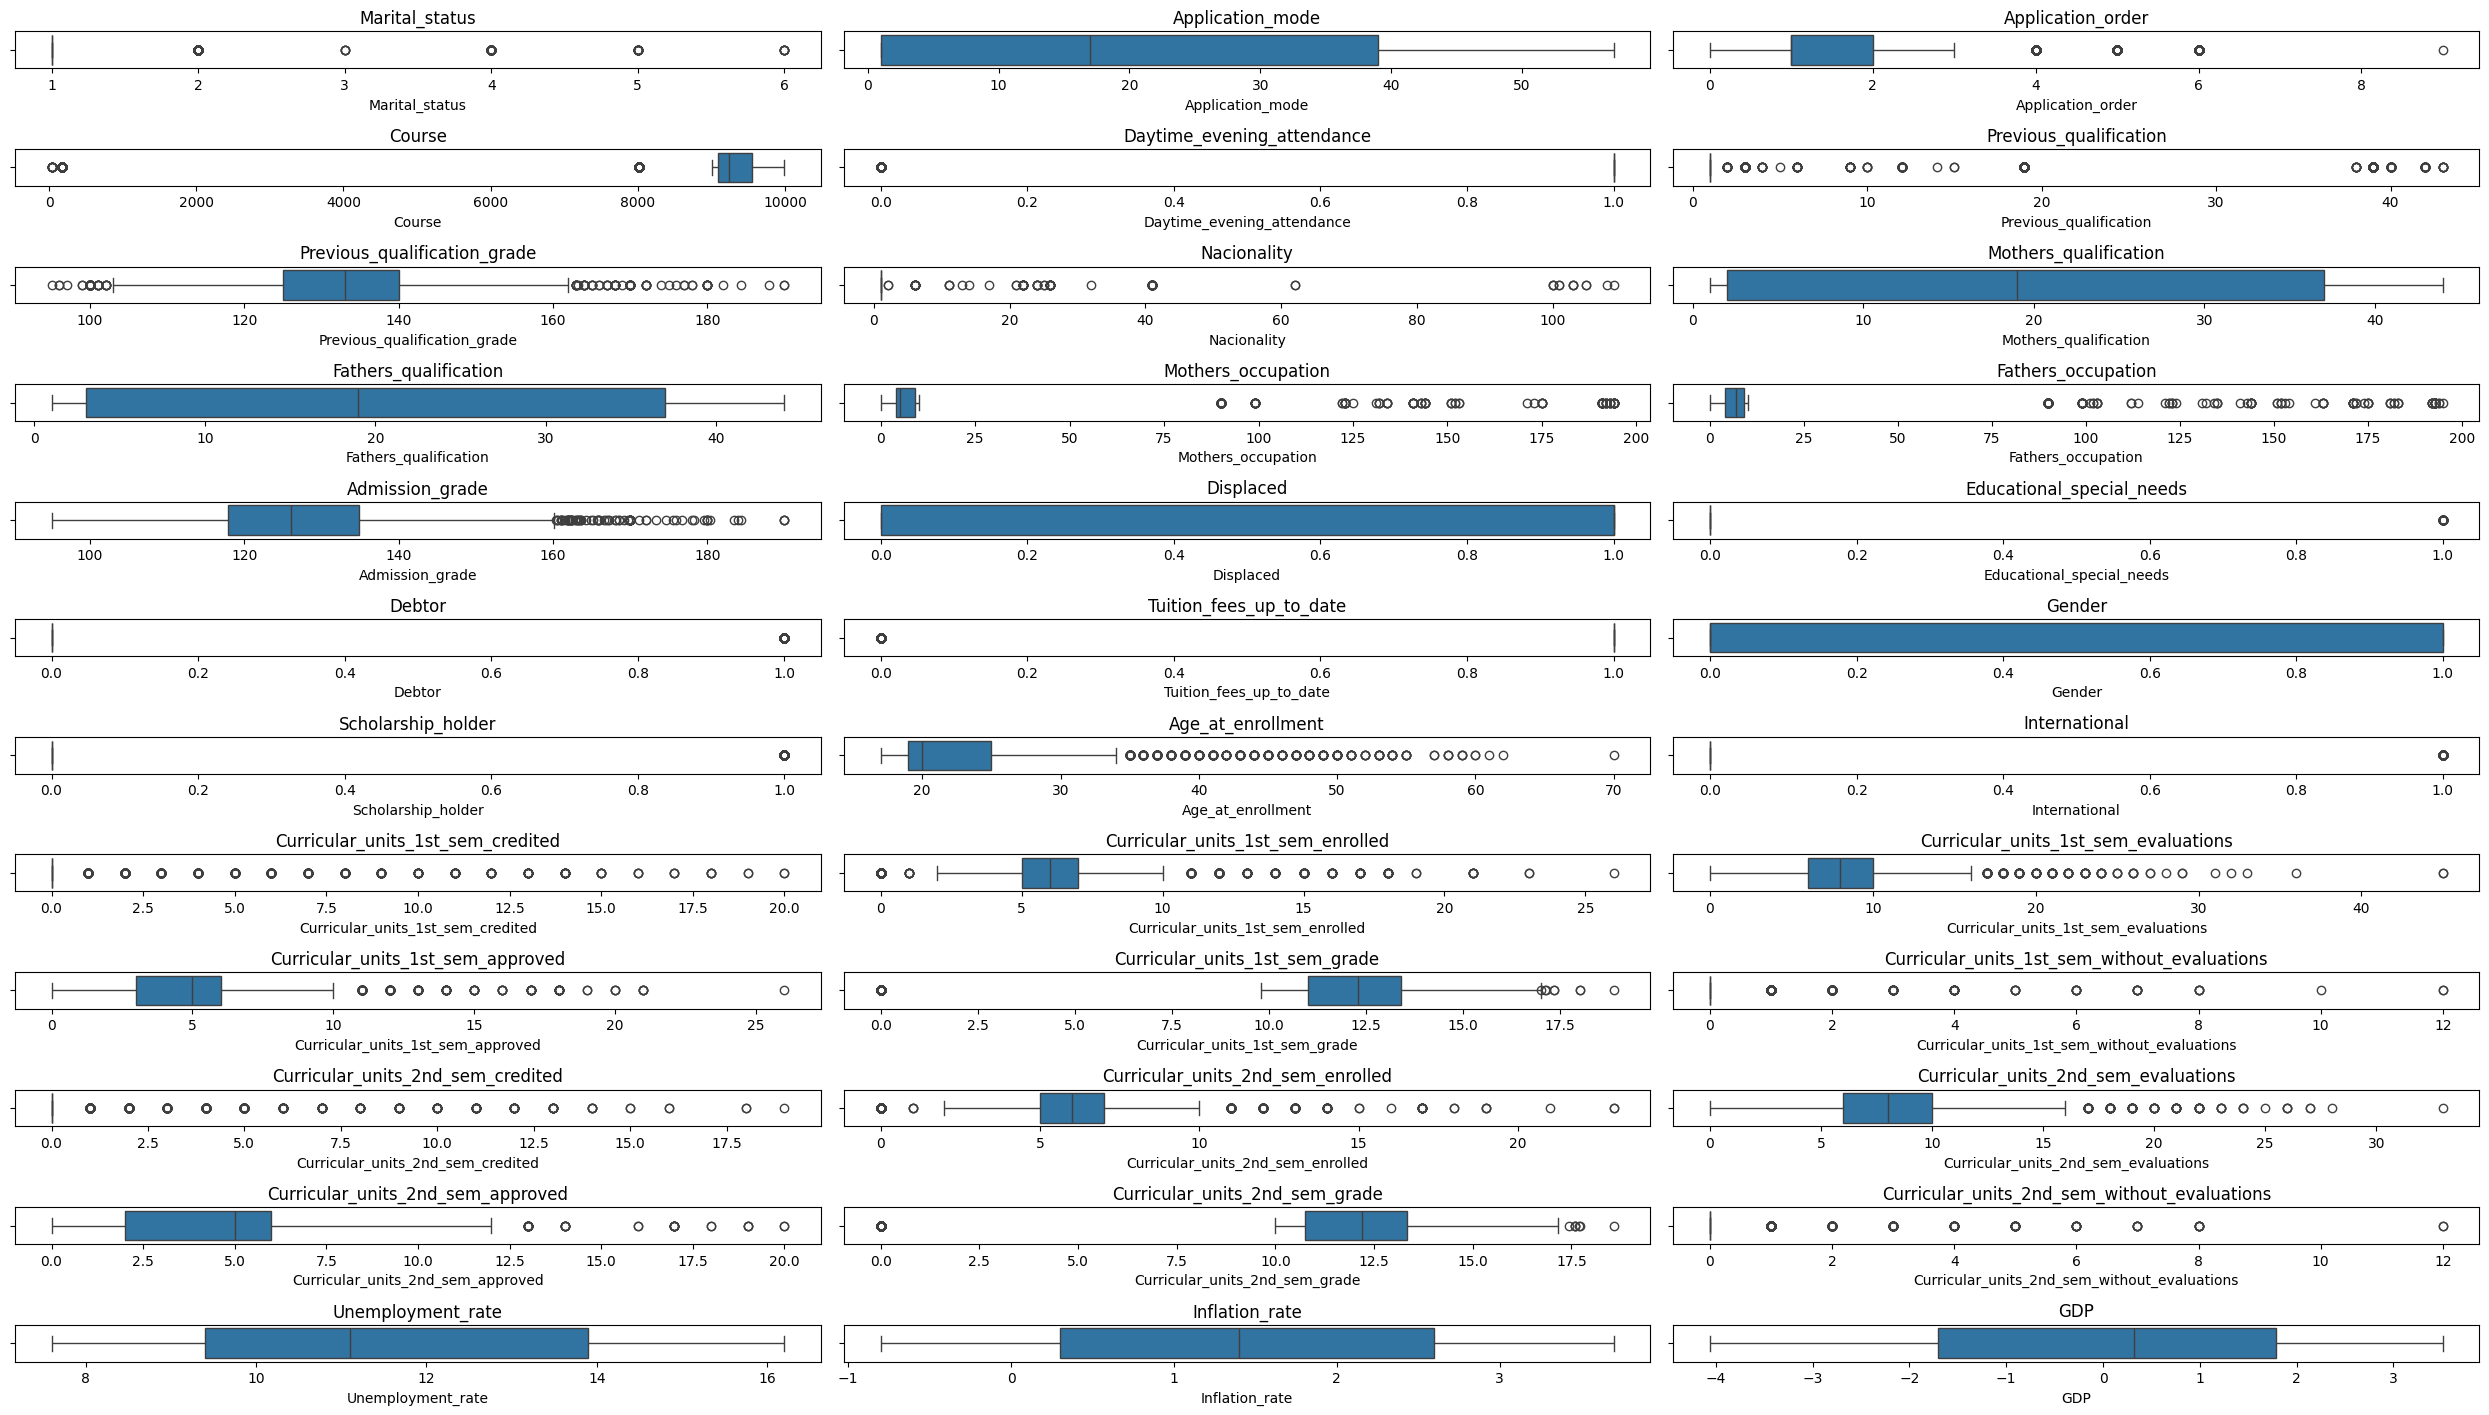

In [10]:
# Cek outlier - Visualisasi
df_numeric = df.select_dtypes(exclude=['object']).copy()
plt.figure(figsize=(25, 15))

for i, feature in enumerate(df_numeric.columns, 1):
    plt.subplot((len(df_numeric.columns) // 3) + 1, 3, i)
    sns.boxplot(x=df_numeric[feature])
    plt.title(feature)

plt.tight_layout()
plt.show()

### Check Correlation

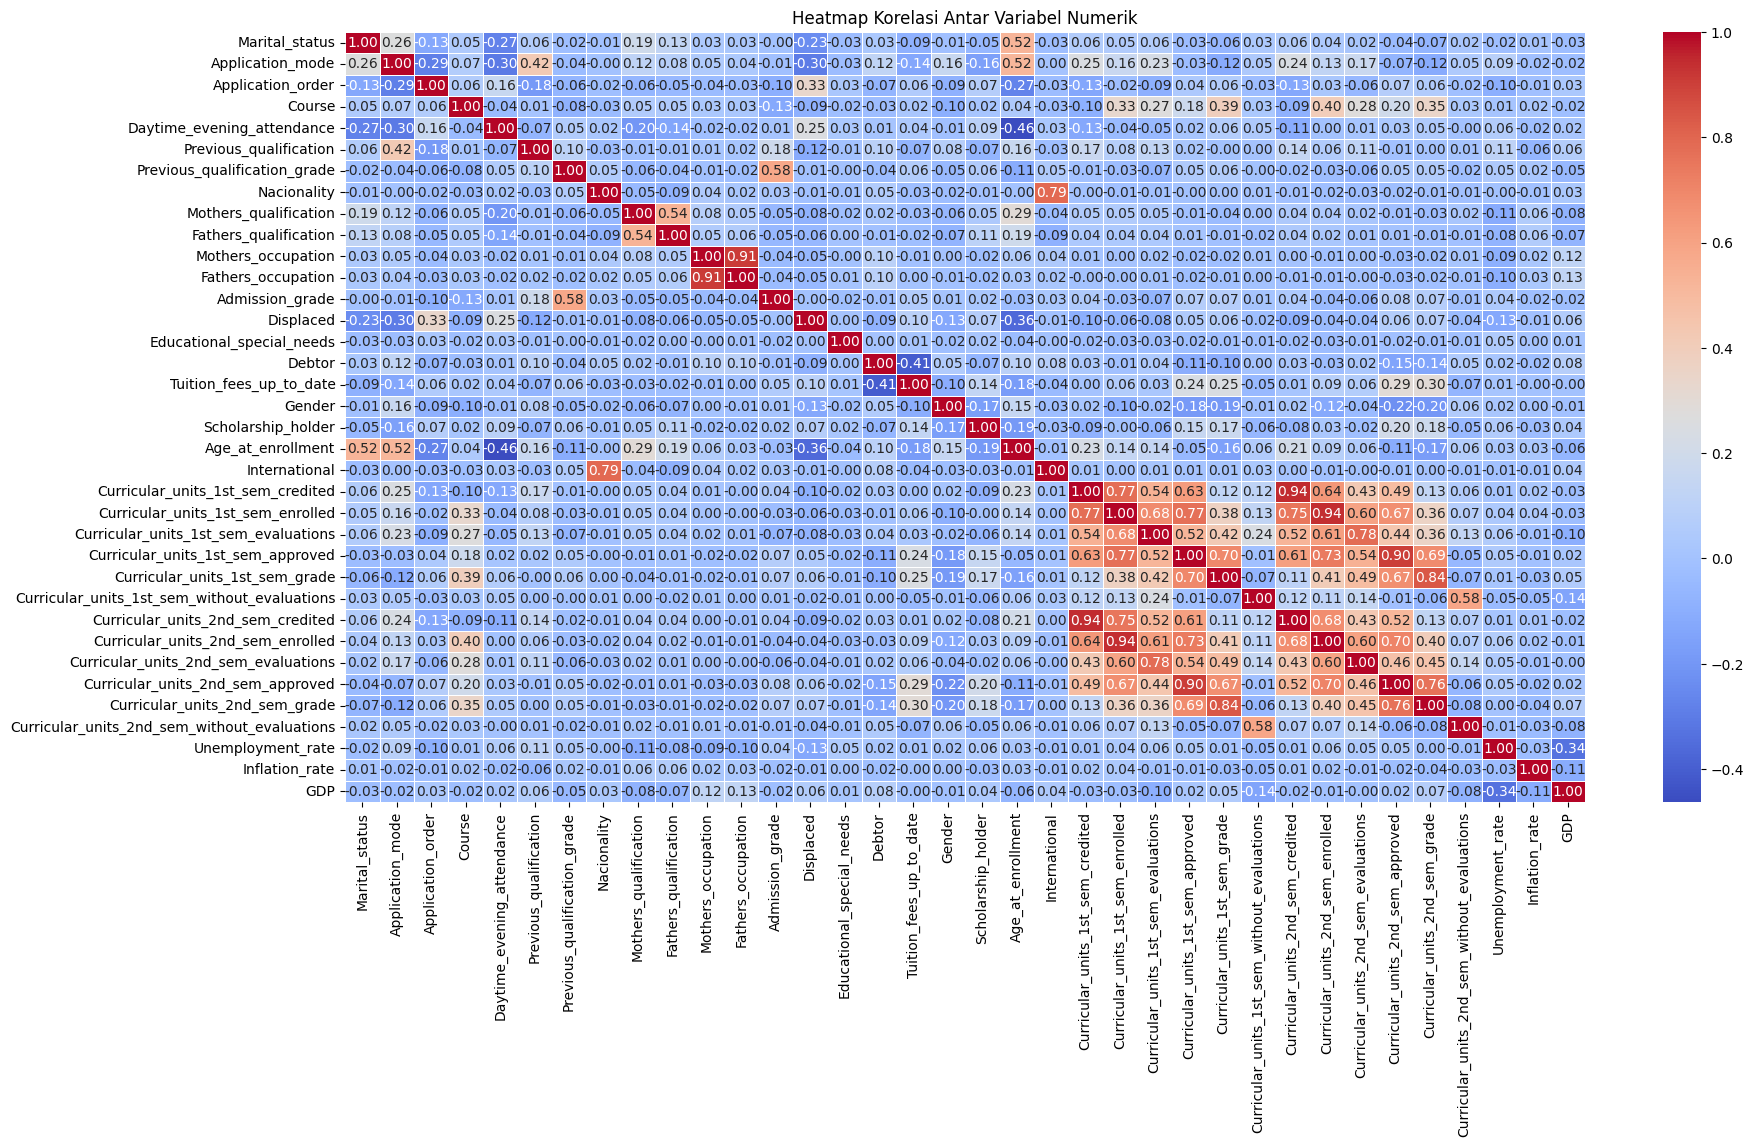

In [11]:
plt.figure(figsize=(20, 10))
sns.heatmap(df_numeric.corr(), annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Heatmap Korelasi Antar Variabel Numerik")
plt.show()


### Status Mahasiswa
Dalam visualisasi ini, ditemukan bahwa hampir setengah mahasiswa berhasil menyelesaikan studi tetapi tingkat dropout cukup tinggi (lebih dari 30%). Hal ini menjadi perhatian untuk melihat faktor - faktor yang mempengaruhi tingkat dropout tersebut

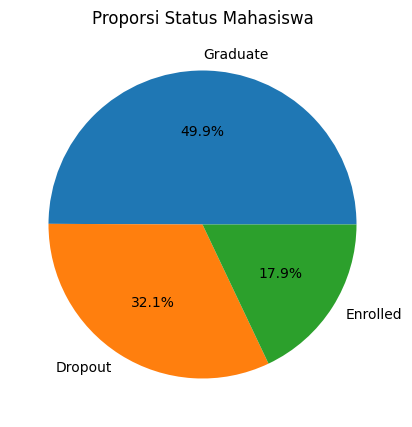

Status
Graduate    2209
Dropout     1421
Enrolled     794
Name: count, dtype: int64


In [12]:
plt.figure(figsize=(8, 5))
df["Status"].value_counts().plot.pie(autopct="%1.1f%%")
plt.title("Proporsi Status Mahasiswa")
plt.ylabel("")  # Menghilangkan label y
plt.show()

print(df['Status'].value_counts())

#### Analisis Pengaruh Beasiswa terhadap mahasiswa Dropout
Dalam visualisasi ini, terlihat bahwa 1287 mahasiswa tanpa beasiswa cenderung memiliki tingkat dropout yang tinggi. Hal ini dapat berkorelasi dengan faktor finansial hingga dukungan akademik. Karena beasiswa sering kali diberikan pada mahasiswa dengan performa akademik yang baik hingga mereka mendapat dukungan tambahan untuk tetap bertahan pada perguruan tinggi

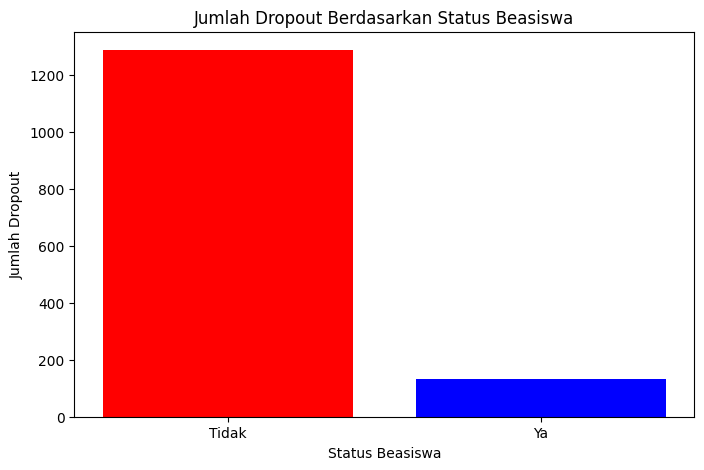

Scholarship_holder
0    1287
1     134
Name: Status, dtype: int64


In [13]:
df_filtered = df[df['Status'] == 'Dropout'].groupby("Scholarship_holder")["Status"].count()

plt.figure(figsize=(8, 5))
plt.bar(df_filtered.index, df_filtered.values, color=["red", "blue"])

plt.title("Jumlah Dropout Berdasarkan Status Beasiswa")
plt.xlabel("Status Beasiswa")
plt.ylabel("Jumlah Dropout")

plt.xticks([0, 1], ['Tidak', 'Ya'])  # Memperbaiki tampilan sumbu x agar lebih jelas

plt.show()

print(df_filtered)


#### Analisis Pengaruh Nilai Masuk (Admission Grade) terhadap Tingkat Dropout
Pada analisis ini, akan ditelaah hubungan antara nilai masuk (admission grade) mahasiswa dengan jumlah mahasiswa yang mengalami dropout, dibagi menjadi dua kategori: non-penerima beasiswa dan penerima beasiswa.

**Temuan Utama (Mahasiswa Non-Penerima Beasiswa yang Dropout):**

- Admission Grade 120.0 memiliki jumlah mahasiswa non-penerima beasiswa terbanyak yang dropout, yaitu 78 orang. (Berdasarkan gambar pertama, 120.0 adalah yang tertinggi, bukan 130.0).
- Admission Grade 130.0 menduduki posisi kedua dengan 68 orang yang dropout.
Secara umum, nilai admission grade yang lebih tinggi (misalnya di atas 100) cenderung memiliki jumlah dropout non-beasiswa yang lebih banyak dalam 10 besar data teratas yang ditampilkan.

**Temuan Utama (Mahasiswa Penerima Beasiswa yang Dropout):**

- Admission Grade 130.0 memiliki jumlah mahasiswa penerima beasiswa terbanyak yang dropout, yaitu 6 orang.
- Admission Grade 100.0 berada di posisi kedua dengan 4 orang yang dropout.
- Terlihat jelas bahwa jumlah mahasiswa penerima beasiswa yang dropout jauh lebih rendah dibandingkan dengan mahasiswa non-penerima beasiswa, meskipun ada beberapa nilai admission grade yang serupa muncul di kedua daftar 10 teratas.

In [14]:
# Filter hanya mahasiswa yang merupakan non-scholarship dan mengalami dropout
df_filtered = df[(df['Status'] == 'Dropout') & (df['Scholarship_holder'] == 0)]
df_grouped = df_filtered.groupby("Admission_grade")["Status"].count()

# Konversi ke DataFrame agar lebih mudah dibaca
df_final_table = pd.DataFrame({'Admission Grade': df_grouped.index, 'Jumlah Dropout Non-Scholarship': df_grouped.values})

# Menampilkan 10 Admission Grade dengan jumlah dropout terbanyak
df_final_table.sort_values(by="Jumlah Dropout Non-Scholarship", ascending=False).head(10)


,Admission Grade,Jumlah Dropout Non-Scholarship
158,120.0,78
251,130.0,68
324,140.0,62
12,100.0,55
72,110.0,33
364,150.0,29
235,128.2,21
398,160.0,13
113,115.0,12
233,128.0,9


In [15]:
# Filter hanya mahasiswa yang merupakan non-scholarship dan mengalami dropout
df_filtered = df[(df['Status'] == 'Dropout') & (df['Scholarship_holder'] == 1)]
df_grouped = df_filtered.groupby("Admission_grade")["Status"].count()

# Konversi ke DataFrame agar lebih mudah dibaca
df_final_table = pd.DataFrame({'Admission Grade': df_grouped.index, 'Jumlah Dropout Scholarship': df_grouped.values})

# Menampilkan 10 Admission Grade dengan jumlah dropout terbanyak
df_final_table.sort_values(by="Jumlah Dropout Scholarship", ascending=False).head(10)


,Admission Grade,Jumlah Dropout Scholarship
71,130.0,6
3,100.0,4
41,123.3,3
19,115.2,3
14,110.0,2
36,121.6,2
27,119.0,2
7,106.0,2
21,116.7,2
10,107.5,2


### Data Tunggakan Biaya Kuliah
Temuan hasil visualisasi ini menunjukkan distribusi mahasiswa berdasarkan status tunggakan biaya kuliah. Terlihat jelas bahwa mayoritas mahasiswa (3896 orang) memiliki tunggakan biaya kuliah, jauh melebihi jumlah mahasiswa yang tidak memiliki tunggakan (528 orang). Hal ini mengindikasikan bahwa tunggakan biaya kuliah dapat menjadi salah satu faktor yang mempengaruhi tingkat dropout yang tinggi

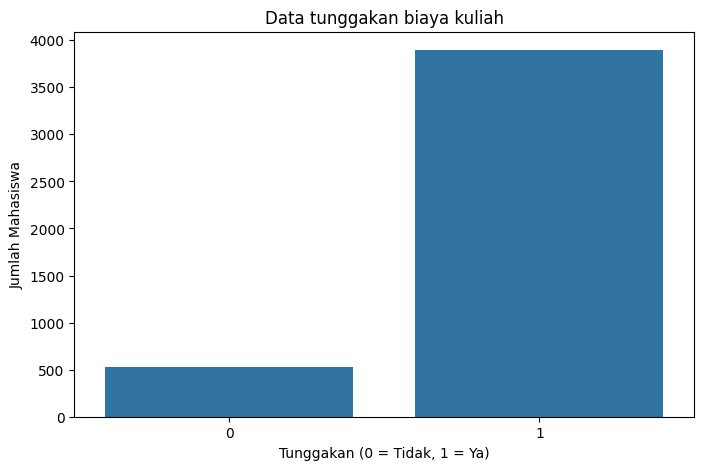

Tuition_fees_up_to_date
1    3896
0     528
Name: count, dtype: int64


In [16]:
df_filtered = df[df['Status'] == 'Dropout'].groupby("Debtor")["Status"].count()

plt.figure(figsize=(8, 5))
sns.countplot(x=df["Tuition_fees_up_to_date"])

plt.title("Data tunggakan biaya kuliah")
plt.xlabel("Tunggakan (0 = Tidak, 1 = Ya)")
plt.ylabel("Jumlah Mahasiswa")

plt.show()

print(df['Tuition_fees_up_to_date'].value_counts())

### Analisis Distribusi Dropout Berdasarkan Tingkat Pendidikan Orang Tua

Berdasarkan hasil temuan yang ada pada visualisasi ini. Terlihat pada grafik Pendidikan Ibu, kelompok dengan pendidikan dasar siklus 1 (setara kelas 4/5) memiliki jumlah dropout mahasiswa tertinggi. Selain itu, kelompok dengan pendidikan menengah dan pendidikan dasar siklus 3 (setara kelas 9/10/11) juga menunjukkan jumlah dropout yang signifikan.

Pola serupa terlihat pada grafik Pendidikan Ayah, di mana tingkat pendidikan dasar siklus 1 (setara kelas 4/5) juga mendominasi jumlah dropout. Kelompok dengan pendidikan menengah dan pendidikan dasar siklus 3 (setara kelas 9/10/11) juga menyumbang angka dropout yang substansial.

Secara keseluruhan, hal ini menunjukkan bahwa mayoritas mahasiswa yang mengalami dropout berasal dari keluarga dengan orang tua yang memiliki tingkat pendidikan dasar hingga menengah.

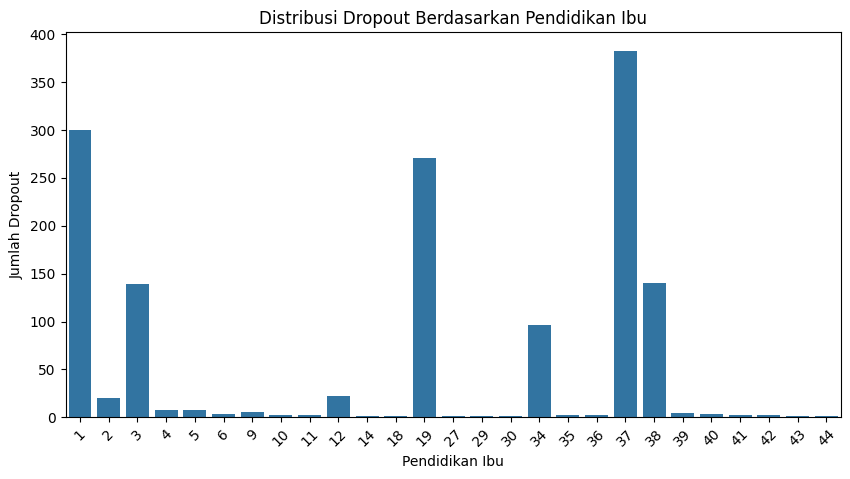

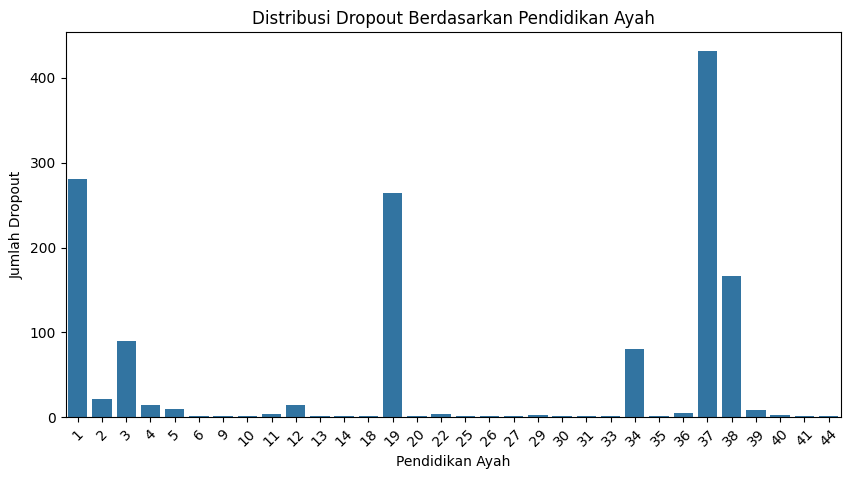

In [17]:
# Filter data untuk mahasiswa yang berstatus "Dropout"
df_dropout = df[df["Status"] == "Dropout"]

# Membuat plot
plt.figure(figsize=(10, 5))
sns.countplot(x=df_dropout["Mothers_qualification"])
plt.title("Distribusi Dropout Berdasarkan Pendidikan Ibu")
plt.xlabel("Pendidikan Ibu")
plt.ylabel("Jumlah Dropout")
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(10, 5))
sns.countplot(x=df_dropout["Fathers_qualification"])
plt.title("Distribusi Dropout Berdasarkan Pendidikan Ayah")
plt.xlabel("Pendidikan Ayah")
plt.ylabel("Jumlah Dropout")
plt.xticks(rotation=45)
plt.show()

### Analisis Pengaruh Faktor Ekonomi Terhadap Jumlah Dropout
Berdasarkan hasil temuan yang ada, terlihat bahwa tingkat pengangguran (Unemployment_rate) memiliki keterkaitan yang lebih jelas dengan jumlah dropout. Periode dengan tingkat pengangguran yang lebih tinggi cenderung memiliki jumlah dropout mahasiswa yang lebih banyak. Contohnya, saat tingkat pengangguran 7.6%, ada 202 mahasiswa yang dropout.

Disisi lain tingkat inflasi dan domestik bruto (GDP) tidak menunjukan pola yang konsisten dengan jumlah dropout yang bervariasi. Hal ini menunjukan bahwa kedua kolom tersebut, tidak berhubungan langsung dengan jumlah dropout seperti unemployment_rate

In [18]:
# Filter hanya mahasiswa dengan status "Dropout"
df_dropout = df[df['Status'] == 'Dropout']

# Hitung jumlah dropout berdasarkan faktor ekonomi
df_grouped = df_dropout.groupby(['Unemployment_rate', 'Inflation_rate', 'GDP']).size().reset_index(name='jumlah_dropout')

# Tampilkan hasil
df_grouped


,Unemployment_rate,Inflation_rate,GDP,jumlah_dropout
0,7.6,2.6,0.32,202
1,8.9,1.4,3.51,102
2,9.4,-0.8,-3.12,174
3,10.8,1.4,1.74,182
4,11.1,0.6,2.02,117
5,12.4,0.5,1.79,107
6,12.7,3.7,-1.70,141
7,13.9,-0.3,0.79,118
8,15.5,2.8,-4.06,139
9,16.2,0.3,-0.92,139


### Tingkat Dropout Berdasarkan Program Studi
Berdasarkan hasil temuan, terlihat bahwa kelas malam dengan jurusan Management memiliki jumlah dropout tertinggi yaitu 138 dan 134 untuk Management kelas reguler

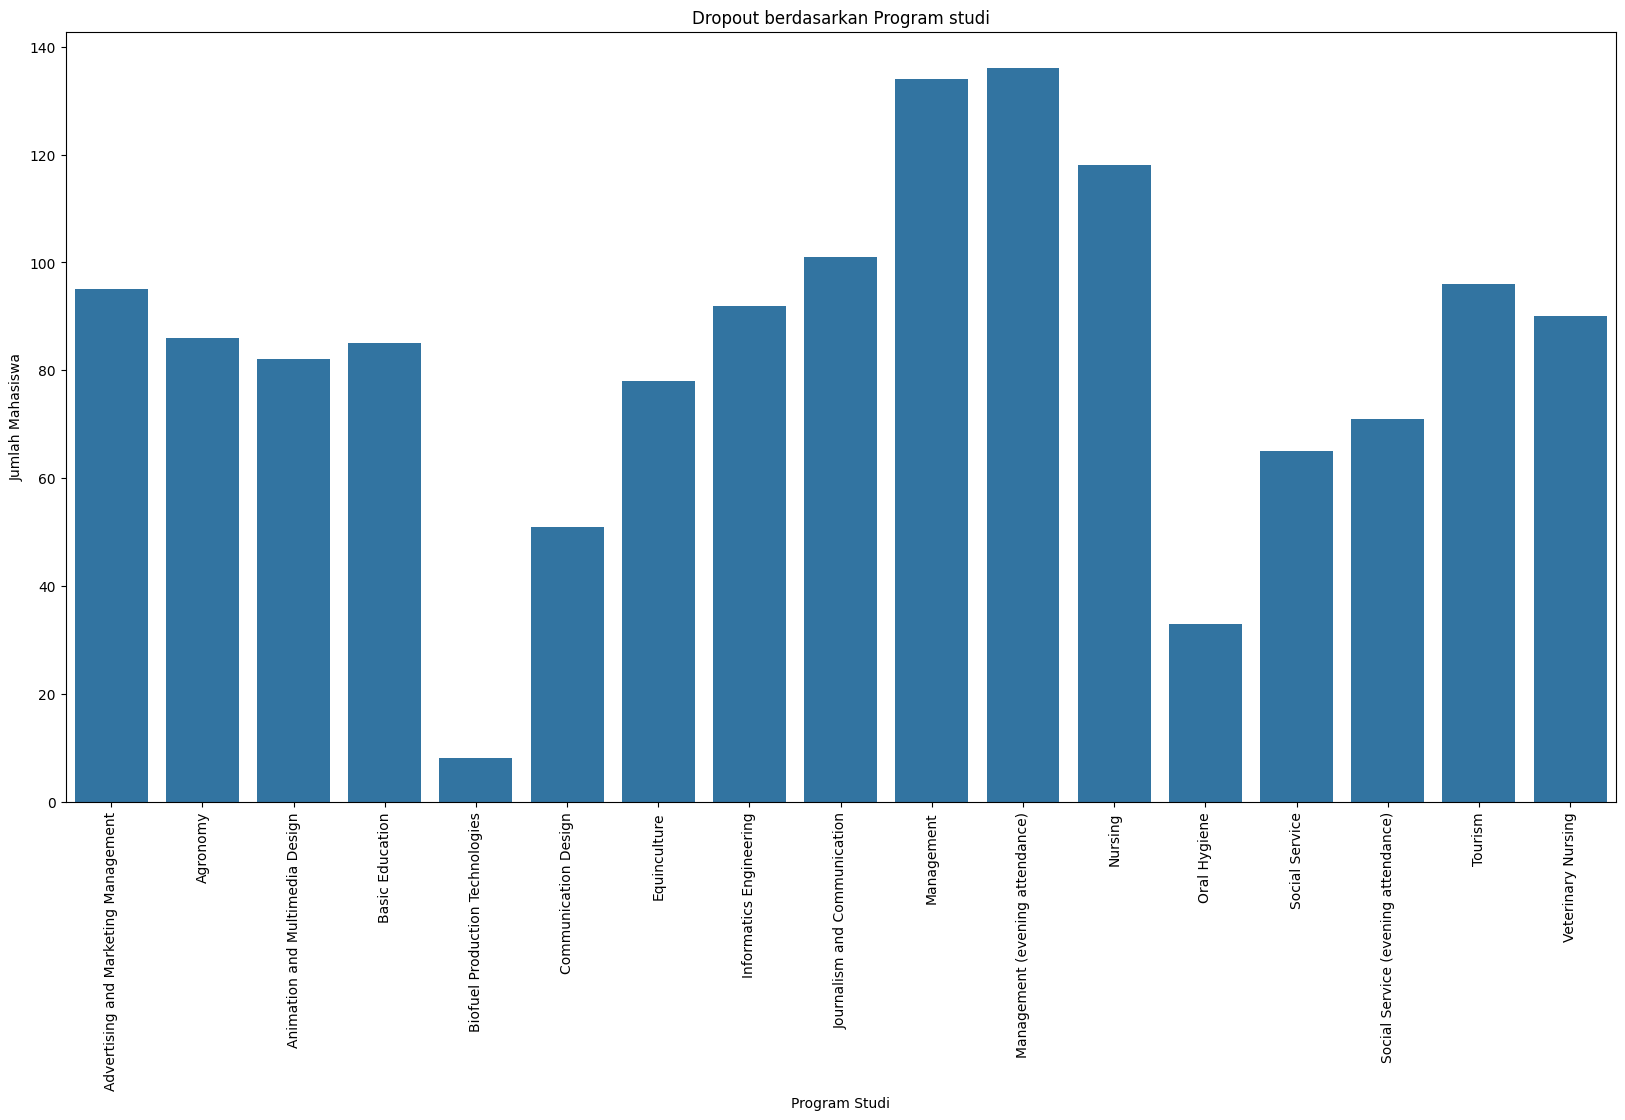

Course
Advertising and Marketing Management     95
Agronomy                                 86
Animation and Multimedia Design          82
Basic Education                          85
Biofuel Production Technologies           8
Communication Design                     51
Equinculture                             78
Informatics Engineering                  92
Journalism and Communication            101
Management                              134
Management (evening attendance)         136
Nursing                                 118
Oral Hygiene                             33
Social Service                           65
Social Service (evening attendance)      71
Tourism                                  96
Veterinary Nursing                       90
Name: Status, dtype: int64


In [19]:
course_mapping = {
    33: 'Biofuel Production Technologies',
    171: 'Animation and Multimedia Design',
    8014: 'Social Service (evening attendance)',
    9003: 'Agronomy',
    9070: 'Communication Design',
    9085: 'Veterinary Nursing',
    9119: 'Informatics Engineering',
    9130: 'Equinculture',
    9147: 'Management',
    9238: 'Social Service',
    9254: 'Tourism',
    9500: 'Nursing',
    9556: 'Oral Hygiene',
    9670: 'Advertising and Marketing Management',
    9773: 'Journalism and Communication',
    9853: 'Basic Education',
    9991: 'Management (evening attendance)'
}

df_temp = df.copy()

df_temp['Course'] = df_temp['Course'].map(course_mapping)

df_filtered = df_temp[df_temp['Status'] == 'Dropout'].groupby("Course")["Status"].count()


plt.figure(figsize=(20, 10))
sns.barplot(x=df_filtered.index, y=df_filtered.values)

plt.title("Dropout berdasarkan Program studi")
plt.xlabel("Program Studi")
plt.xticks(rotation=90)
plt.ylabel("Jumlah Mahasiswa")

plt.show()

print(df_filtered)

### Cek Pengaruh Evaluasi dan Kredit Akademik terhadap Dropout

Berdasarkan hasil temuan pada data di bawah ini, kurangnya partisipasi dalam evaluasi akademik dan kegagalan dalam mengumpulkan kredit unit kurikuler merupakan indikator kuat atau faktor penyebab tingginya jumlah dropout. Terlihat pada kolom pertama, ketika mahasiswa tidak aktif dan tidak adanya SKS yang diikuti atau tidak memenuhi jumlah keharusan SKS yang diikuti, cenderung mengalami dropout

In [20]:
# Filter hanya mahasiswa dengan status "Dropout"
df_dropout1 = df[df['Status'] == 'Dropout']

# Hitung jumlah dropout berdasarkan faktor ekonomi
df_grouped1 = df_dropout1.groupby(['Curricular_units_1st_sem_evaluations', 'Curricular_units_2nd_sem_evaluations',
                                   'Curricular_units_1st_sem_credited', 'Curricular_units_2nd_sem_credited']).size().reset_index(name='jumlah_dropout')

# Tampilkan hasil
df_grouped1.head(10)

,Curricular_units_1st_sem_evaluations,Curricular_units_2nd_sem_evaluations,Curricular_units_1st_sem_credited,Curricular_units_2nd_sem_credited,jumlah_dropout
0,0,0,0,0,241
1,0,2,0,0,1
2,0,6,0,0,1
3,0,10,0,0,1
4,0,11,0,0,1
5,0,12,0,0,1
6,1,0,0,0,5
7,2,0,0,0,2
8,2,1,2,1,1
9,2,2,0,0,1


## Data Preparation / Preprocessing

### Menghapus Fitur
Menghapus beberapa kolom tertentu terutama yang tidak digunakan selama proses permodelan

In [21]:
df.columns

Index(['Marital_status', 'Application_mode', 'Application_order', 'Course',
       'Daytime_evening_attendance', 'Previous_qualification',
       'Previous_qualification_grade', 'Nacionality', 'Mothers_qualification',
       'Fathers_qualification', 'Mothers_occupation', 'Fathers_occupation',
       'Admission_grade', 'Displaced', 'Educational_special_needs', 'Debtor',
       'Tuition_fees_up_to_date', 'Gender', 'Scholarship_holder',
       'Age_at_enrollment', 'International',
       'Curricular_units_1st_sem_credited',
       'Curricular_units_1st_sem_enrolled',
       'Curricular_units_1st_sem_evaluations',
       'Curricular_units_1st_sem_approved', 'Curricular_units_1st_sem_grade',
       'Curricular_units_1st_sem_without_evaluations',
       'Curricular_units_2nd_sem_credited',
       'Curricular_units_2nd_sem_enrolled',
       'Curricular_units_2nd_sem_evaluations',
       'Curricular_units_2nd_sem_approved', 'Curricular_units_2nd_sem_grade',
       'Curricular_units_2nd_sem_wit

In [22]:
df = df.drop(['Curricular_units_1st_sem_credited',
       'Curricular_units_1st_sem_enrolled',
       'Curricular_units_1st_sem_evaluations',
       'Curricular_units_1st_sem_approved', 'Curricular_units_1st_sem_grade',
       'Curricular_units_1st_sem_without_evaluations',
       'Curricular_units_2nd_sem_credited',
       'Curricular_units_2nd_sem_enrolled',
       'Curricular_units_2nd_sem_evaluations',
       'Curricular_units_2nd_sem_approved', 'Curricular_units_2nd_sem_grade',
       'Curricular_units_2nd_sem_without_evaluations', 'Application_order'],
            axis=1)

### Handling Outliers

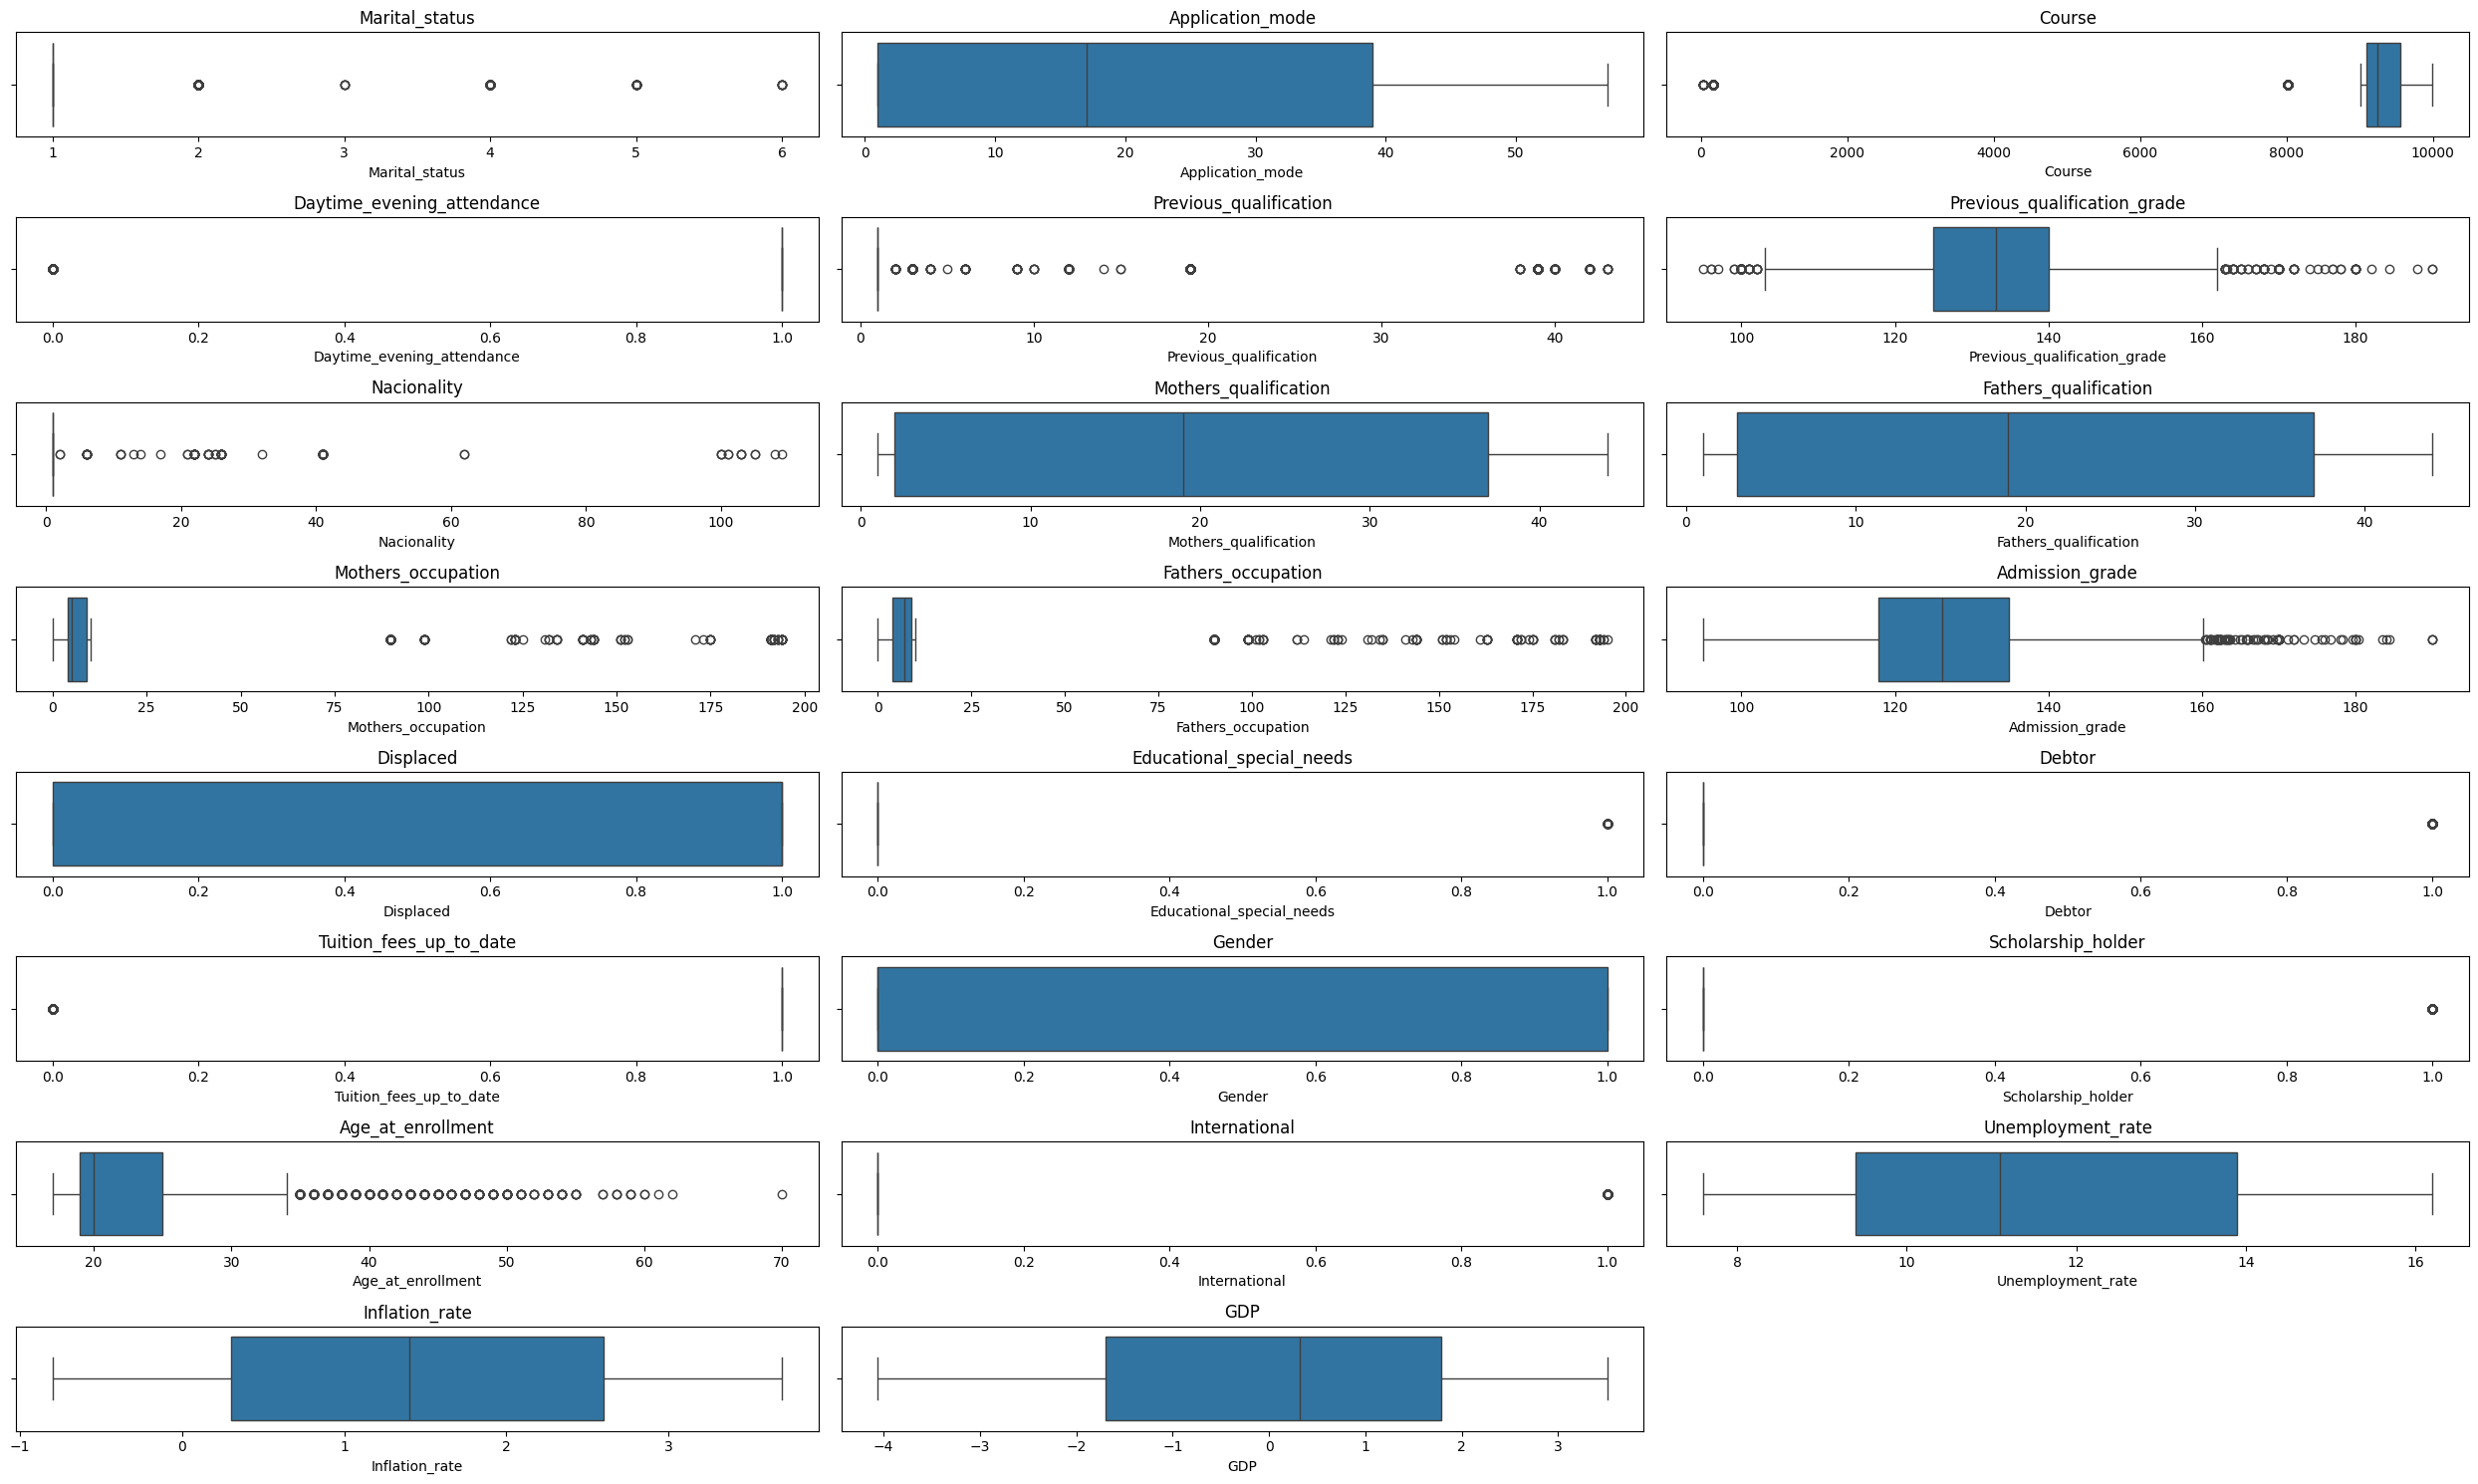

In [23]:
# Cek outlier - Visualisasi
df_numeric = df.select_dtypes(exclude=['object']).copy()
plt.figure(figsize=(25, 15))

for i, feature in enumerate(df_numeric.columns, 1):
    plt.subplot((len(df_numeric.columns) // 3) + 1, 3, i)
    sns.boxplot(x=df_numeric[feature])
    plt.title(feature)

plt.tight_layout()
plt.show()

Selanjutnya melakukan handling outlier menggunakan winsorize untuk setiap kolom numerik. Dengan menggunakan metode ini, akan mengganti nilai ekstrem dengan persentil tertentu (5% teratas dan 5% terbawah)

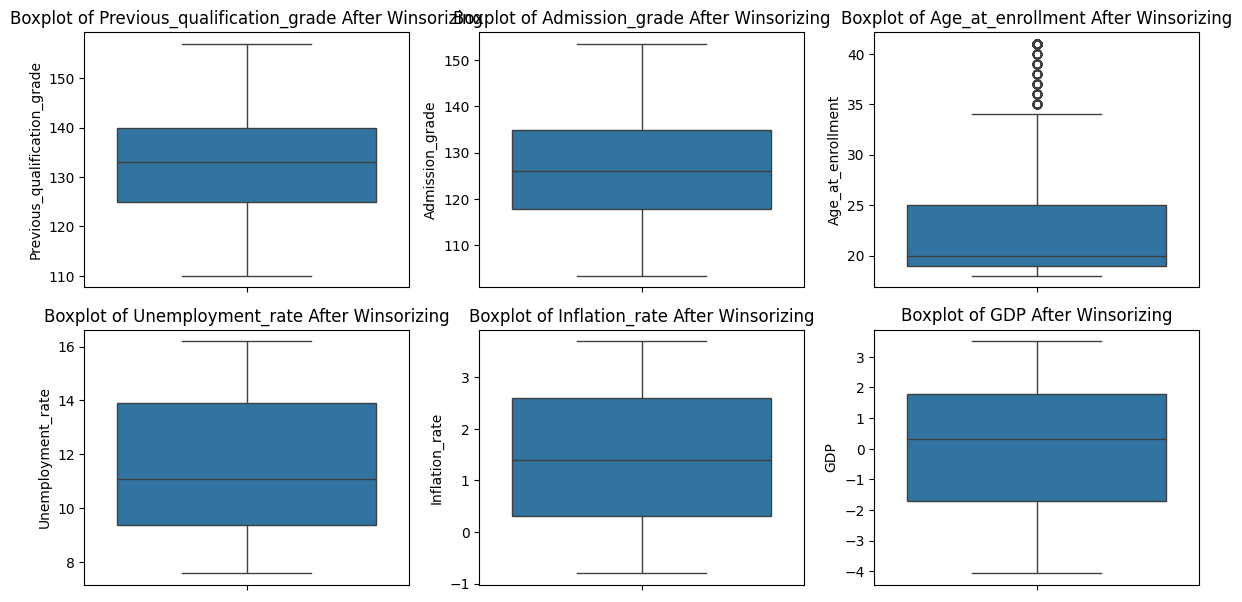

In [24]:
from scipy.stats.mstats import winsorize
# Menangani data numerik
df_winsorized = df.copy()

winsorized_columns = [
    'Previous_qualification_grade',
    'Admission_grade',
    'Age_at_enrollment',
    'Unemployment_rate',
    'Inflation_rate',
    'GDP'
]

for col in winsorized_columns:
    df_winsorized[col] = winsorize(df_winsorized[col], limits=[0.05, 0.05])  # Winsorizing 5% atas & bawah

# Visualisasi dengan Boxplot
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(12, 12))
axes = axes.flatten()

for i in range(len(winsorized_columns)):
    sns.boxplot(y=df_winsorized[winsorized_columns[i]], ax=axes[i])
    axes[i].set_title(f'Boxplot of {winsorized_columns[i]} After Winsorizing')

for j in range(len(winsorized_columns), len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()

Selanjutnya, lakukan handling untuk kolom Age_at_enrollment menggunakan robust scaler. Robust Scaler adalah metode penskalaan yang efektif untuk data dengan outlier, karena ia menggunakan median dan rentang interkuartil (IQR) untuk mengubah skala nilai, sehingga tidak terpengaruh oleh nilai-nilai ekstrem. Tujuannya adalah menstandardisasi data agar siap untuk analisis lebih lanjut.

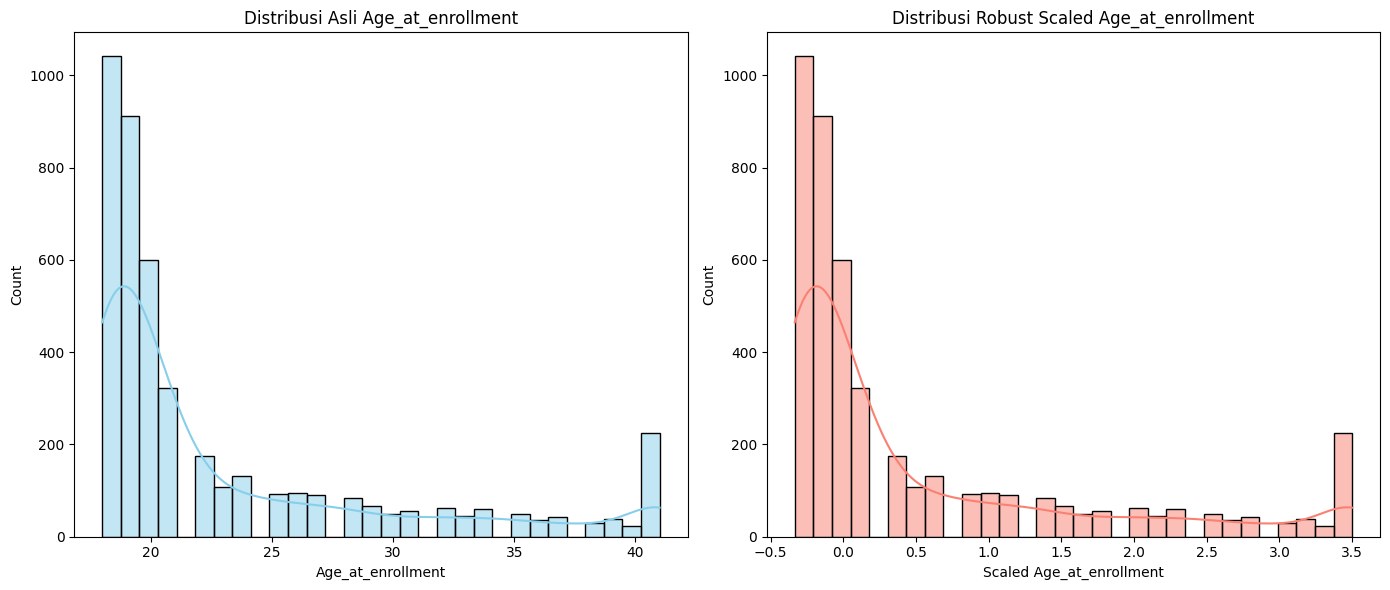

In [25]:
# Tindak lanjut untuk age at enrollment
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
df_winsorized['Age_at_enrollment_scaled'] = scaler.fit_transform(df_winsorized[['Age_at_enrollment']])

# Buat visualisasi perbandingan distribusi
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Histogram distribusi asli
sns.histplot(df_winsorized['Age_at_enrollment'], bins=30, ax=axes[0], kde=True, color='skyblue')
axes[0].set_title('Distribusi Asli Age_at_enrollment')
axes[0].set_xlabel('Age_at_enrollment')

# Histogram distribusi setelah Robust Scaling
sns.histplot(df_winsorized['Age_at_enrollment_scaled'], bins=30, ax=axes[1], kde=True, color='salmon')
axes[1].set_title('Distribusi Robust Scaled Age_at_enrollment')
axes[1].set_xlabel('Scaled Age_at_enrollment')

plt.tight_layout()
plt.show()

### Label Encoder untuk Kolom Status
Selanjutnya akan melakukan pelabelan menggunakan LabelEncoder dari sklearn. Label encoding ini akan mengonversi nilai kategori menjadi angka agar dapat dipahami saat pemodelan machine learning.

Catatan: Dropout: 0, Enrolled: 1, Graduate: 2

In [26]:
df_encoded = df_winsorized.copy()

le = LabelEncoder()
df_encoded['Status'] = le.fit_transform(df_encoded['Status'])

### One-Hot Encoding
Pada tahap ini, akan dilakukan pengubahan data kategorikal menjadi format numerik melalui one-hot encoding dan akan mengonversi nilai boolean menjadi bilangan bulat (1, 0).

Dalam kasus ini, kategorikal kolom seperti:
- Application_mode
- Course
- Nacionality
- Mothers_qualification
- Fathers_qualification
- Mothers_occupation
- Fathers_occupation

sudah memiliki nilai numerik sebagai valuenya, tetapi belum terdistrbusi dengan baik dan terdapat rentang nilai yang terlalu jauh, maka dari itu akan digunakan one-hot encoding.

In [27]:
categorical_columns = [
    'Application_mode',
    'Course',
    'Nacionality',
    'Mothers_qualification',
    'Fathers_qualification',
    'Mothers_occupation',
    'Fathers_occupation'
]

df_encoded = pd.get_dummies(df_encoded, columns=categorical_columns, drop_first=True)

In [28]:
df_encoded = df_encoded.astype(int)
df_encoded

,Marital_status,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Admission_grade,Displaced,Educational_special_needs,Debtor,Tuition_fees_up_to_date,Gender,...,Fathers_occupation_172,Fathers_occupation_174,Fathers_occupation_175,Fathers_occupation_181,Fathers_occupation_182,Fathers_occupation_183,Fathers_occupation_192,Fathers_occupation_193,Fathers_occupation_194,Fathers_occupation_195
0,1,1,1,122,127,1,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,1,1,1,157,142,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,1,1,122,124,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1,1,1,122,119,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,2,0,1,110,141,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1,1,1,125,122,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
4420,1,1,1,120,119,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4421,1,1,1,154,149,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4422,1,1,1,157,153,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


### Menyiapkan fitur dan target
Selanjutnya, mempersiapkan dataset untuk pemodelan machine learning dengan menghapus variable target 'status' pada fitur X dan menggunakan variable 'status' untuk fitur y sebagai target yang akan diprediksi

In [29]:
X = df_encoded.drop('Status', axis=1)
y = df_encoded['Status']

### Train Test Split
Membagi nilai test dan train untuk masing - masing feature dengan kombinasi 80% data training dan 20% data testing

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [31]:
print(f"Jumlah data latih: {X_train.shape[0]}")
print(f"Jumlah data uji: {X_test.shape[0]}")

Jumlah data latih: 3539
Jumlah data uji: 885


### Resampling Data - Imbalance Data (SMOTE)

Melihat data target (y) mengindikasikan imbalance data. Untuk mengatur ini digunakan SMOTE untuk membuat data seimbang dengan menambah data sintetis agar setara dengan kelas mayoritas

In [32]:
print(y_train.value_counts())

Status
2    1767
0    1137
1     635
Name: count, dtype: int64


In [35]:
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

print(y_resampled.value_counts())

Status
2    1767
0    1767
1    1767
Name: count, dtype: int64


### Normalisasi - Standard Scaler
Tahapan selanjutnya adalah normalisasi. Hal ini dilakukan agar memastikan bahwa fitur memiliki skala yang seragam. Proses ini menggunakan StandardScaler() dari library sklearn dengan melakukan fit dan transform pada data training serta menerapkan tranform data uji

In [36]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_resampled)
X_test_scaled = scaler.transform(X_test)

## Modeling
Dalam proses ini akan dilakukan pelatihan model menggunakan algoritma XGBoost dengan batas iterasi maximum 1000. Dengan menambahkan parameter multi:softprob untuk klasifikasi multi-kelas dan scale_pos_weight untuk memperhitungkan distribusi target

In [37]:
model = XGBClassifier(
    objective='multi:softprob',
    eval_metric='mlogloss',
    random_state=42,
    use_label_encoder=False,
    scale_pos_weight = {0:1, 1:5, 2:1},
    max_iter=1000
)

# Latih model
model.fit(X_train_scaled, y_resampled)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_iter=1000,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, ...)

## Evaluation
Pada tahapan ini akan dilakukan evaluasi terkait data uji yang ditampilkan dengan conffusion matrix untuk menganalisis performa model serta melakukan perhitungan ROC AUC Score untuk menunjukan seberapa baik model melakukan prediksi berdasarkan feature yang ada.

In [38]:
# Prediksi pada test data
y_pred = model.predict(X_test_scaled)

# Tampilkan Confusion Matrix dan Classification Report
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

y_score = model.predict_proba(X_test_scaled)
roc_auc = roc_auc_score(y_test, y_score, multi_class='ovr')
print("\nROC AUC Score:", roc_auc)

Confusion Matrix:
[[173  36  75]
 [ 46  38  75]
 [ 54  52 336]]

Classification Report:
              precision    recall  f1-score   support

           0       0.63      0.61      0.62       284
           1       0.30      0.24      0.27       159
           2       0.69      0.76      0.72       442

    accuracy                           0.62       885
   macro avg       0.54      0.54      0.54       885
weighted avg       0.60      0.62      0.61       885


ROC AUC Score: 0.7592318055923952


#### **Berdasarkan hasil confussion matrix:**

```
[[173 36 75]
 [ 46 38 75]
 [ 54 52 336]]
```

- Kategori Kelas 0: 173 prediksi benar
- Kategori Kelas 1: 38 prediksi benar
- Kategori Kelas 2: 336 prediksi benar
- Angka di luar diagonal adalah prediksi yang salah.

Contoh: Untuk kategori 0, ada 36 yang salah diprediksi sebagai kategori 1, dan 75 yang salah diprediksi sebagai kategori 2.
Model kesulitan membedakan kategori 1 dengan kategroi lain (hanya 38 benar, tapi banyak salah diprediksi sebagai kategori 0 atau 2).


#### **Berdasarkan Classification Report:**

**Precision:** hasil uji untuk akurat prediksi positif.
  - Kelas 0: 0.63 (Dari semua yang diprediksi sebagai kelas 0, 63% memang kelas 0)
  - Kelas 1: 0.30 (Sangat rendah, menunjukkan model sering salah memprediksi kelas lain sebagai kelas 1, atau sebaliknya)
  - Kelas 2: 0.69 (Cukup baik)

**Recall (Sensitivity):** Kemampuan model untuk menemukan semua instance positif dari kelas tersebut.
  - Kelas 0: 0.61 (Dari semua yang seharusnya kelas 0, 61% berhasil ditemukan)
  - Kelas 1: 0.24 (Sangat rendah, menunjukkan model kesulitan menemukan instance kelas 1 yang sebenarnya, hanya 24% yang berhasil)
  - Kelas 2: 0.76 (Cukup baik, model relatif bagus dalam menemukan instance kelas 2, yaitu 76%)

**F1-Score:** mengukur keseimbangan antara precision dan recall.
  - Kelas 0: 0.62
  - Kelas 1: 0.27 (Sangat rendah, mengkonfirmasi kinerja buruk untuk kelas ini)
  - Kelas 2: 0.72 (Terbaik di antara ketiga kelas)

**Support:** Jumlah aktual instance (sampel) untuk setiap kelas dalam data yang diuji.
  - Kelas 0: 284
  - Kelas 1: 159 (Kelas minoritas dalam dataset)
  - Kelas 2: 442 (Kelas mayoritas)

#### Metrik Agregat:

**Accuracy:** 0.62 (62%) - Proporsi prediksi yang benar secara keseluruhan.

**Macro Avg:** 0.54 untuk kinerja rata-rata model tanpa mempertimbangkan ukuran kelas.

**Weighted Avg:** 0.60


**ROC AUC Score**
ROC AUC Score: 0.7592318055923952

Nilai 0.759 ini menunjukan bahwa model memiliki kemampuan membedakan kelas dengan diskriminasi cukup baik (diatas 0.50).

#### Analisis feature model

In [39]:
# Dapatkan feature importance dari model XGBoost
feature_importances = model.feature_importances_
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Urutkan berdasarkan Importance secara menurun
importance_df = importance_df.sort_values(by='Importance', ascending=False)

In [40]:
importance_df.head(30)

,Feature,Importance
8,Tuition_fees_up_to_date,0.122310
10,Scholarship_holder,0.054667
44,Course_9500,0.028804
87,Mothers_qualification_34,0.025912
35,Course_8014,0.023478
42,Course_9238,0.021819
120,Fathers_qualification_34,0.019768
47,Course_9773,0.018872
19,Application_mode_7,0.018015
141,Mothers_occupation_90,0.015375


Nilai - nilai dalam fitur dengan nilai Importance tertinggi dianggap sebagai faktor paling berpengaruh.

Berdasarkan tabel ini, fitur-fitur yang paling penting adalah:

- Tuition_fees_up_to_date (Tunggakan Biaya Kuliah): Ini adalah fitur paling penting, menunjukkan bahwa status tunggakan biaya kuliah memiliki pengaruh terbesar terhadap hasil yang diprediksi oleh model.
- Scholarship_holder (Penerima Beasiswa): Selanjutnya pada fitur ini menunjukkan bahwa status penerima beasiswa juga sangat penting dalam model.
- Course_9500, Mothers_qualification_34, Course_8014, Course_9238, Fathers_qualification_34, Course_9773: Fitur-fitur ini juga memiliki tingkat kepentingan yang cukup tinggi, menunjukkan bahwa jenis mata kuliah dan tingkat pendidikan orang tua juga merupakan faktor yang relevan.

#### Dataframe hasil prediksi
Menggabungkan hasil prediksi ke dalam dataframe untuk dianalisis lebih lanjut serta menyertakan label aktual, prediksi model, dan probabilitas attrition

In [41]:
results_df = X_test.copy()
results_df['Actual_Dropout'] = y_test.values
results_df['Predicted_Dropout'] = y_pred
results_df['Attrition_Probability'] = model.predict_proba(X_test_scaled)[:, 1]

In [42]:
results_df

,Marital_status,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Admission_grade,Displaced,Educational_special_needs,Debtor,Tuition_fees_up_to_date,Gender,...,Fathers_occupation_181,Fathers_occupation_182,Fathers_occupation_183,Fathers_occupation_192,Fathers_occupation_193,Fathers_occupation_194,Fathers_occupation_195,Actual_Dropout,Predicted_Dropout,Attrition_Probability
1853,1,1,39,157,153,1,0,0,1,1,...,0,0,0,0,0,0,0,2,2,0.017752
2399,1,1,1,131,126,0,0,0,1,1,...,0,0,0,0,0,0,0,2,2,0.179861
510,1,1,1,121,120,1,0,0,1,0,...,0,0,0,0,0,0,0,1,1,0.670369
242,1,1,1,118,119,1,0,0,1,0,...,0,0,0,0,0,0,0,2,2,0.084464
3392,1,1,1,133,153,0,0,0,1,0,...,0,0,0,0,0,0,0,2,2,0.033671
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555,1,1,39,150,150,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0.269195
2418,1,1,42,130,130,1,0,0,0,1,...,0,0,0,0,0,0,0,2,1,0.429572
2367,1,1,1,131,128,1,0,0,1,1,...,0,0,0,0,0,0,0,2,0,0.044861
1801,1,0,3,130,130,0,0,0,1,1,...,0,0,0,0,0,0,0,2,2,0.004004


In [43]:
dropout_predictions_df = results_df[results_df['Predicted_Dropout'] == 0].copy()
dropout_predictions_df.head(10)

,Marital_status,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Admission_grade,Displaced,Educational_special_needs,Debtor,Tuition_fees_up_to_date,Gender,...,Fathers_occupation_181,Fathers_occupation_182,Fathers_occupation_183,Fathers_occupation_192,Fathers_occupation_193,Fathers_occupation_194,Fathers_occupation_195,Actual_Dropout,Predicted_Dropout,Attrition_Probability
1787,1,0,3,140,140,0,0,0,1,1,...,0,0,0,0,0,0,0,2,0,0.005996
1864,1,1,1,140,131,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0.060600
3158,1,1,1,121,123,1,0,0,1,1,...,0,0,0,0,0,0,0,1,0,0.241743
230,1,1,1,140,123,1,0,0,1,0,...,0,0,0,0,0,0,0,2,0,0.095648
723,1,0,1,140,115,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0.001029
4220,1,1,1,133,147,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0.044958
703,2,0,1,120,133,1,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0.036519
89,1,1,1,115,112,1,0,1,1,1,...,0,0,0,0,0,0,0,1,0,0.045801
4312,1,0,3,130,130,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0.000130
3194,1,0,1,120,128,0,0,1,1,1,...,0,0,0,0,0,0,0,1,0,0.126284


In [44]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(results_df['Actual_Dropout'], results_df['Predicted_Dropout'])
print(f"Akurasi Prediksi: {accuracy:.2%}")

Akurasi Prediksi: 61.81%


In [45]:
# Save model
import joblib
from sklearn.linear_model import LogisticRegression

filename = 'model.joblib'
joblib.dump(model, filename)

loaded_model = joblib.load(filename)